<a href="https://colab.research.google.com/drive/1Fj7HgKYtf5i0q895Onkvq0PHM0mTr5YG?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset :  

The Alzheimer MRI dataset available on [Kaggle](https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset/download?datasetVersionNumber=1) is a collection of brain magnetic resonance imaging (MRI) scans used for the detection and classification of Alzheimer's disease. The dataset comprises MRI images categorized into multiple stages of Alzheimer’s disease progression, ranging from **mild dmented**, **moderate demented**, **very-mild demented**, to **non-demented** controls. Such datasets are critical for training machine learning models to learn the intricate patterns and biomarkers associated with this neurodegenerative disorder. The early detection and accurate classification of Alzheimer's disease can assist in better management and treatment planning, thereby enhancing patient care.

## Deep Learning Model Overview :

Our aim is to train a deep learning model that can accurately classify MRI images into the correct stage of Alzheimer's disease. Here's an abstract representation of the steps we will follow in our deep learning code using Python in this notebook:

- Data Preprocessing : Load the dataset and perform necessary preprocessing steps. This involves resizing images to a uniform shape, normalizing pixel values, augmenting the dataset (if needed to prevent overfitting), and splitting into training, validation, and test sets.

- Model Selection: Construct a convolutional neural network (CNN) for image classification. The architecture will be designed to extract key features from the MRI scans using convolutional and pooling layers and classify the extracted features using one or more fully connected layers.

- Training: Compile the model with an appropriate optimizer (e.g., Adam), loss function (e.g., categorical_crossentropy for multi-class classification), and metrics (e.g., accuracy). Train the model using the training data with validation data to monitor performance.

- Evaluation: After training, evaluate the model's performance on the unseen test set to get an estimate of how well it can generalize to new data. Record key metrics like accuracy, precision, recall, and F1-score.

- Fine-tuning and Optimization (If Needed): If the initial results are not satisfactory, perform hyperparameter tuning or employ more sophisticated techniques like transfer learning using pre-trained models.

- Model Deployment: Once satisfied with the model's performance, save the model checkpoints for future inference or deployment in clinical diagnostic systems.

**Note** : Implementing the above approach effectively requires a deep understanding of neural network architectures and hyperparameters, as well as careful consideration of the ethical implications of automated medical diagnosis.

# Import Required Libraries

In [28]:
import os                          # Used for file path manipulation and directory operations
import cv2                         # Used for image processing tasks like reading, resizing, and converting images
import numpy as np                 # Used for mathematical operations and data manipulation
import seaborn as sns              # Used for data visualization and plotting
import random                      # Used for generating random numbers for data augmentation
import matplotlib.pyplot as plt     # Used for creating and visualizing plots
from sklearn.model_selection import train_test_split             # Used to split data into training, validation, and test sets
from sklearn.preprocessing import LabelEncoder                   # Used to encode categorical labels into numerical values
from keras.utils import to_categorical, plot_model                         # Used to one-hot encode categorical labels for multi-class classification
import tensorflow as tf                                          # Used to access TensorFlow backend and functionalities
import keras                                                     # Used for building and training deep learning models
from keras.models import Sequential, Model                       # Used to define different types of model architectures
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense            # Used to define individual layers within the model
from keras.callbacks import ModelCheckpoint                                                  # Used to save the best performing model during training
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report           # Used to evaluate the model's performance

from keras.losses import SparseCategoricalCrossentropy
loss = SparseCategoricalCrossentropy()


# Data Preprocessing

In [5]:
# Set the path to your dataset directory
data_dir = "Dataset"

In [6]:
Class = os.listdir(data_dir)

for file in Class:
    print(file)
print(f"Number of Classes: {len(Class)}")

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented
Number of Classes: 4


In [8]:
all_files = os.walk(data_dir)

for root, dirs, files in all_files:
    print(f"root: {root}")   # directories
    print(f"directories: {dirs}")   # sub-directories from root
    print(f"files: {files}")    # all files from root and dirs

root: Dataset
directories: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
files: []
root: Dataset\Mild_Demented
directories: []
files: ['mild.jpg', 'mild_10.jpg', 'mild_100.jpg', 'mild_101.jpg', 'mild_102.jpg', 'mild_103.jpg', 'mild_104.jpg', 'mild_105.jpg', 'mild_106.jpg', 'mild_107.jpg', 'mild_108.jpg', 'mild_109.jpg', 'mild_11.jpg', 'mild_110.jpg', 'mild_111.jpg', 'mild_112.jpg', 'mild_113.jpg', 'mild_114.jpg', 'mild_115.jpg', 'mild_116.jpg', 'mild_117.jpg', 'mild_118.jpg', 'mild_119.jpg', 'mild_12.jpg', 'mild_120.jpg', 'mild_121.jpg', 'mild_122.jpg', 'mild_123.jpg', 'mild_124.jpg', 'mild_125.jpg', 'mild_126.jpg', 'mild_127.jpg', 'mild_128.jpg', 'mild_129.jpg', 'mild_13.jpg', 'mild_130.jpg', 'mild_131.jpg', 'mild_132.jpg', 'mild_133.jpg', 'mild_134.jpg', 'mild_135.jpg', 'mild_136.jpg', 'mild_137.jpg', 'mild_138.jpg', 'mild_139.jpg', 'mild_14.jpg', 'mild_140.jpg', 'mild_141.jpg', 'mild_142.jpg', 'mild_143.jpg', 'mild_144.jpg', 'mild_145.jpg', 'mild_146.j

In [9]:
# Create an empty list to hold all image file names
image_files = []

# Recursively iterate through each subfolder and get a list of all image file names
for root, directories, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.jpg'):   # Change the file extension to match your images
            image_files.append(os.path.join(root, file))

Print the number of files in the list of `image_files`:

In [10]:
# Print the number of files in the list
print(f"The number of image files: {len(image_files)}")

The number of image files: 6400


# Image Preprocessing

In [20]:
# Load and preprocess the images
X = []
y = []

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    img = img.astype('float32') / 255.0  # normalize pixel values to [0,1]
    X.append(img)
    label = file.split('\\')[-2]  # get the label from the subfolder name
    y.append(label)

# Convert the lists to arrays
X = np.array(X)
y = np.array(y)




Then demonstrate a sample image for each class. The following script serves this aim that selects **4** random images from each class in a given dataset, where the class labels are stored in `y` and the corresponding images are stored in `X`. It then creates a dictionary that stores the selected images for each class, and displays them using matplotlib. The code iterates through each class label, selects the corresponding images, and uses random sampling to select **4** random images. Finally, it creates a figure with **1** row and **4** columns of subplots, and displays the selected images in each subplot along with their corresponding class label

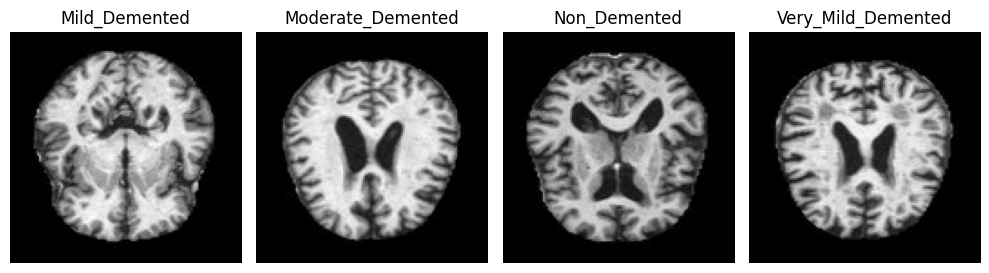

In [21]:
# Get a list of unique class labels
classes = np.unique(y)

# Create a dictionary to hold the selected images for each class
selected_images = {}

# Iterate through each class and select 4 random images
for label in classes:
    class_images = X[y == label]
    selected = random.sample(list(class_images), 4)
    selected_images[label] = selected

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(10,10))
for i in range(4):
   axs[i].imshow(selected_images[classes[i]][0])
   axs[i].set_title(classes[i])
   axs[i].axis("off")

plt.tight_layout()
plt.show()

# Train Test Split `training`, `testing`, `validation` :

Now let's split our dataset of preprocessed images into *training*, *validation*, and *testing* sets, you can use the `train_test_split` function from the `scikit-learn` library, as follows :


In [24]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)



# Print the shape of each set
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape:', X_valid.shape, y_valid.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (5120, 128, 128, 3) (5120,)
Validation set shape: (640, 128, 128, 3) (640,)
Testing set shape: (640, 128, 128, 3) (640,)


The split ensures that the model is trained on a subset of the data, validated on another subset to tune hyperparameters, and tested on a final subset to evaluate performance, all while avoiding overfitting to any one set of images.

From the above result, `y_train` has shape `(5120,)`. This suggests that the training dataset contains **5120** images and `y_train` contains the corresponding target labels for each image. The fact that `y_train` is a one-dimensional array indicates that it is a vector rather than a matrix. However, we have **4** different classes for the target variable, namely:

`['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']`

 Therefore, the shape of `y_train` should be `(5120,4)`. This is a common issue in Machine Learning problems where we need to handle multi-class classification tasks.

To fix this issue, we will use *one-hot encoding*, which is a popular technique in multi-class classification problems. *One-hot encoding* involves converting the categorical target variable into a binary vector representation. In our case, we have **4** classes, so the one-hot encoded vector for each image will have **4** elements, with a value of **1** in the position corresponding to the correct class and **0**s in all other positions.

In [25]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform them
y_train = label_encoder.fit_transform(y_train)

# Transform the validation labels
y_valid = label_encoder.transform(y_valid)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes=4)
y_valid = to_categorical(y_valid, num_classes=4)


In [26]:
# Print the shape of training and validation labels
print(f"Training set shape: {y_train.shape}")
print(f"Validation set shape: {y_valid.shape}")

Training set shape: (5120, 4)
Validation set shape: (640, 4)


# Building Model

The architecture of **Convolutional Neural Network (CNN)** model :

In [27]:
img_height = 128
img_width = 128

# Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer="he_normal", input_shape = (img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model.add(MaxPooling2D())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))


- Image dimensions: Define the height and width of the input images.
- Model initialization: Create a Sequential model object.
- First Convolutional Layer:

       1- Applies 16 filters with a 3x3 kernel size to the input image.
       2- Uses "same" padding to maintain the original image size.
       3- Adds non-linearity with the "relu" activation function.
       4- Initializes the filter weights with the "he_normal" initializer.
       5- Specifies the input shape of the image.
- Max Pooling Layer:

       1- Reduces the spatial dimensions of the feature maps by taking the maximum value over 2x2 neighbor regions.
- Second Convolutional Layer:

       1- Applies 32 filters with a 3x3 kernel size to the extracted features.
       2- Uses the same configuration as the first convolutional layer.
- Second Max Pooling Layer:

       1- Further reduces the spatial dimensions of the feature maps.
- Dropout Layer:

       1- Randomly drops out 25% of the neurons during training to prevent overfitting.
- Flatten Layer:

       1- Converts the 2D feature maps into a 1D vector for dense layers.
- First Dense Layer:

       1- Adds a fully connected layer with 128 neurons.
       2- Uses the "relu" activation function for non-linearity.
- Second Dense Layer:

      1- Adds another fully connected layer with 64 neurons.
      2- Uses the "relu" activation function for non-linearity.
- Output Layer:

      1- Adds the final fully connected layer with 4 neurons, corresponding to the number of classes.
      2- Uses the "softmax" activation function to output probabilities for each class.

## Compiling & Plotting the Model

In [55]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# visualize the model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training & Fitting the Model

Now Let's train our model

In [30]:
checkpoint = ModelCheckpoint(filepath = 'D:\Graduation Project\Alzheimer Detection\model.h5',
                                                save_weights_only = False,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only = True)
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), callbacks = [checkpoint], epochs = 50)

Epoch 1/50
160/160 [==============================] - ETA: 0s - loss: 0.9518 - accuracy: 0.5734

C:\Users\Marwa\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 29s 123ms/step - loss: 0.9518 - accuracy: 0.5734 - val_loss: 0.7648 - val_accuracy: 0.6484
Epoch 2/50
160/160 [==============================] - 15s 92ms/step - loss: 0.5448 - accuracy: 0.7734 - val_loss: 0.5026 - val_accuracy: 0.7750
Epoch 3/50
160/160 [==============================] - 15s 96ms/step - loss: 0.2836 - accuracy: 0.8922 - val_loss: 0.2972 - val_accuracy: 0.8859
Epoch 4/50
160/160 [==============================] - 16s 98ms/step - loss: 0.1507 - accuracy: 0.9459 - val_loss: 0.1555 - val_accuracy: 0.9453
Epoch 5/50
160/160 [==============================] - 15s 95ms/step - loss: 0.1103 - accuracy: 0.9605 - val_loss: 0.1647 - val_accuracy: 0.9500
Epoch 6/50
160/160 [==============================] - 16s 101ms/step - loss: 0.0877 - accuracy: 0.9689 - val_loss: 0.1147 - val_accuracy: 0.9641
Epoch 7/50
160/160 [==============================] - 16s 101ms/step - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.1053 - val_accuracy: 0.9672


 * - save_weights_only (bool):

  *This argument determines whether to save the entire model or just the model's weights.*
  
           1- If True, only the weights of the model are saved, which can be smaller and faster to load.
           2- If False, the entire model architecture is saved along with the weights, making it easier 
            to load but requiring more storage space.
    
* - monitor (str):

          1- This argument specifies the metric that the callback will monitor to determine whether to save the model.
          2- The available options depend on your model and the metrics you're calculating during training.
          3- In this case, 'val_accuracy' indicates that the callback will check the validation accuracy after each epoch.

* - mode (str): 

     *This argument defines how the monitored metric is used to determine whether to save the model.*

     **Possible values are 'auto', 'min', and 'max'.**

           1- 'auto': If the monitored metric is "acc" or starts with "fmeasure", the mode is set to "max". Otherwise, 
                  it is set to "min".
           2- 'min': Saves the model when the monitored metric reaches its minimum value during training.
           3- 'max': Saves the model when the monitored metric reaches its maximum value during training.

* - save_best_only (bool):

      *This argument determines whether to save the best model or all models during training.*

      *This argument determines whether to only save the model when the monitored metric improves.*

           1- If True, only the model with the best value of the monitored metric will be saved.
           2- If False, the model will be saved after each epoch regardless of whether the monitored metric improves.

In [35]:
model.save('model.keras')

In [36]:
model = keras.models.load_model('D:\Graduation Project\Alzheimer Detection\model.keras')

# Measure Performance and Analysis

In [37]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_valid, y_valid)

print(f"Validation loss: {round(loss,2)}")
print(f"Validation accuracy: {round(accuracy,2)}")

20/20 [==============================] - 5s 60ms/step - loss: 0.0486 - accuracy: 0.9937
Validation loss: 0.05
Validation accuracy: 0.99


We can demonstrate the performance of our CNN model during training by plotting the **accuracy score** and the **loss values** of the *training* dataset and *validation* dataset over time. This allows us to see how the model is learning and whether it generalizes well to new data.

For example, the first plot shows the **accuracy scores** of the *training* and *validation* datasets over 50 epochs. Both the **training accuracy** and the **validation accuracy** are tending towards 1, indicating that our model is learning well and improving its performance over time

## Visualizing

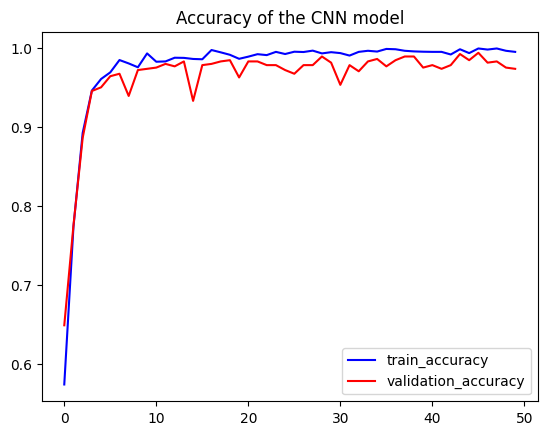

In [38]:
# Plot the accuracy score of our model
plt.plot(history.history['accuracy'], c='b', label='train_accuracy')
plt.plot(history.history['val_accuracy'], c='r', label='validation_accuracy')
plt.title('Accuracy of the CNN model')
plt.legend()
plt.show()

Similarly, the second plot shows the **loss values** of the *training* and *validation* datasets over 50 epochs. Both the **training loss** and the **validation loss** are tending towards 0, indicating that our model is generalizing well to new data and is not overfitting

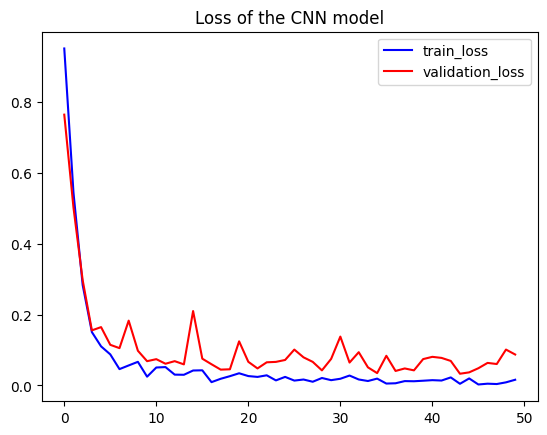

In [39]:
# Plot the loss value of our model
plt.plot(history.history['loss'], c='b', label='train_loss')
plt.plot(history.history['val_loss'], c='r', label='validation_loss')
plt.title('Loss of the CNN model')
plt.legend()
plt.show()


In [40]:
# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Calculate the accuracy
acc = accuracy_score(y_true, y_pred_classes)

print(f"Accuracy score of the model: {round(acc, 2)}")

20/20 [==============================] - 4s 69ms/step
Accuracy score of the model: 0.99


**Precision** :  measures what proportion of positive predictions are correct.

**recall** :  measures what proportion of actual positives are correctly predicted by the model. 

**F1-score**  : is the harmonic mean of *precision* and *recall* that measures the balance between these metrics, and it's a useful metric when you want to balance *precision* and *recall*, particularly in cases where the classes are imbalanced.

In [41]:
# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print(confusion_mtx)


20/20 [==============================] - 1s 45ms/step
[[ 89   0   0   2]
 [  0   7   0   0]
 [  0   0 318   2]
 [  0   0   0 222]]


Visualizing *Confusion Matrix* with help of `seaborn` library

20/20 [==============================] - 1s 34ms/step


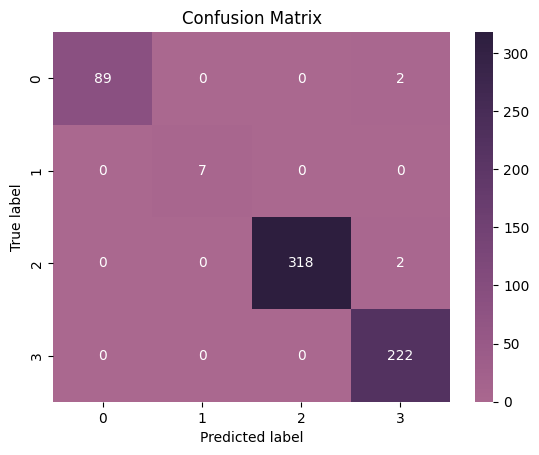

In [52]:
# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


# Plot the heatmap
cmap = sns.cubehelix_palette(light=0.5, as_cmap=True)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=cmap)    # 'fmt'->controls the format of the values displayed within each cell of the heatmap
                                                                # 'd' ->This displays the values as decimal integers.
# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


20/20 [==============================] - 1s 55ms/step


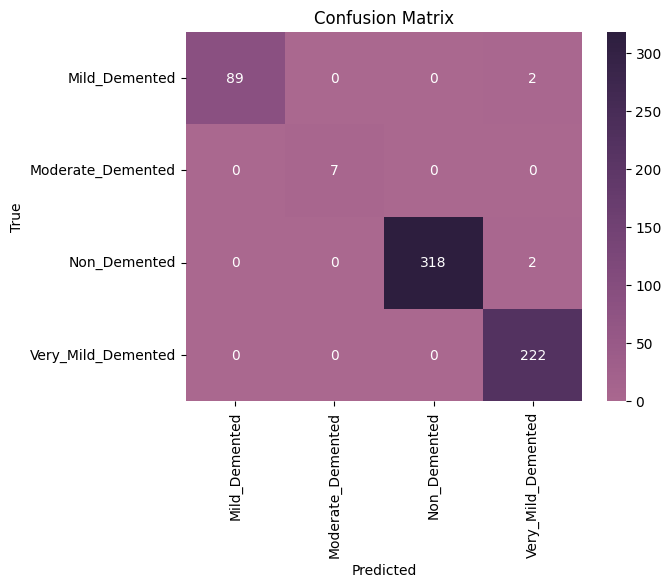

In [53]:
# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
cmap = sns.cubehelix_palette(light=0.5, as_cmap=True)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Precision & Recall & F1 Score

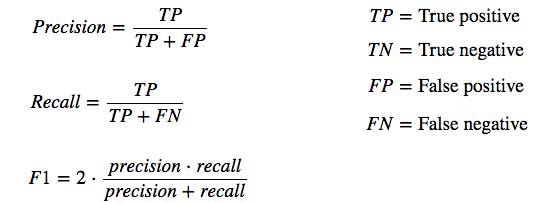

Classification Report

In [54]:
# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Get the classification report
class_report = classification_report(y_true, y_pred_classes, target_names = class_names)

# Print the classification report
print(class_report)

20/20 [==============================] - 0s 19ms/step
                    precision    recall  f1-score   support

     Mild_Demented       1.00      0.98      0.99        91
 Moderate_Demented       1.00      1.00      1.00         7
      Non_Demented       1.00      0.99      1.00       320
Very_Mild_Demented       0.98      1.00      0.99       222

          accuracy                           0.99       640
         macro avg       1.00      0.99      0.99       640
      weighted avg       0.99      0.99      0.99       640

